<a href="https://colab.research.google.com/github/varshith192/AIML-lab/blob/main/LAB9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
df= pd.read_csv('/content/loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [14]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [15]:
print("following is a breakup of creadit approval status.1 means approved credit,0 means not approved.")
print(df['credit.policy'].value_counts())

following is a breakup of creadit approval status.1 means approved credit,0 means not approved.
1    7710
0    1868
Name: credit.policy, dtype: int64


Text(0.5, 0, 'FICO score')

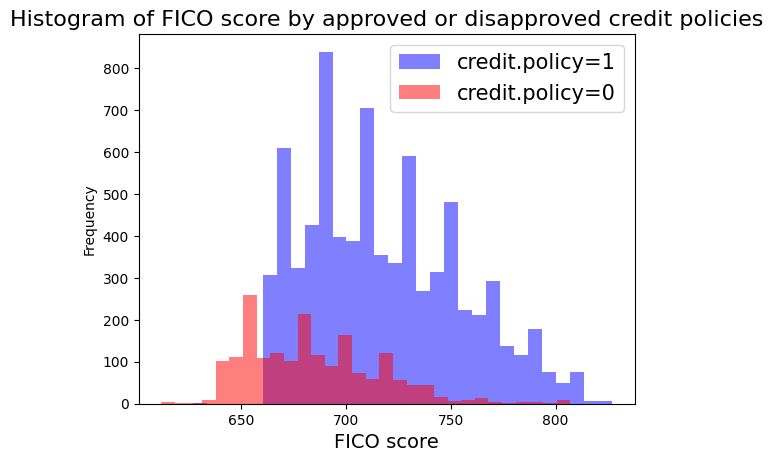

In [16]:
df[df['credit.policy']==1]['fico'].plot.hist(bins=30,alpha=0.5,color='blue',label='credit.policy=1')
df[df['credit.policy']==0]['fico'].plot.hist(bins=30,alpha=0.5,color='red',label='credit.policy=0')
plt.legend(fontsize=15)
plt.title("Histogram of FICO score by approved or disapproved credit policies",fontsize=16)
plt.xlabel("FICO score",fontsize=14)

Text(0, 0.5, 'Iterest rate')

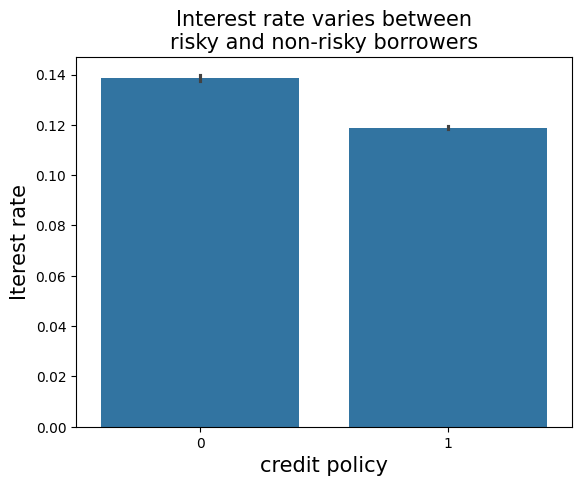

In [17]:
sns.barplot(x=df['credit.policy'],y=df['int.rate'])
plt.title("Interest rate varies between\nrisky and non-risky borrowers",fontsize=15)
plt.xlabel("credit policy",fontsize=15)
plt.ylabel("Iterest rate",fontsize=15)

Text(0, 0.5, 'Days with credit line')

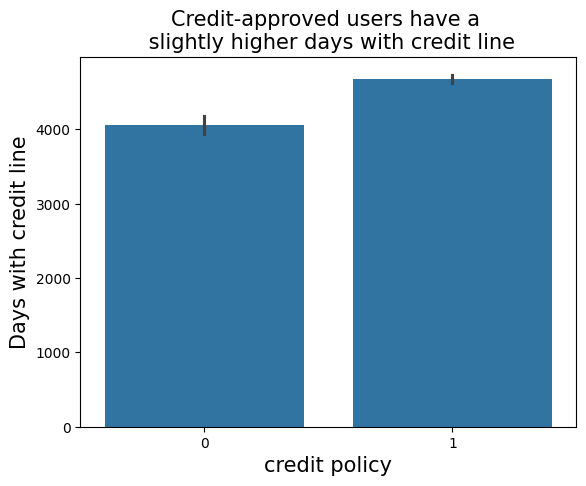

In [18]:
sns.barplot(x=df['credit.policy'],y=df['days.with.cr.line'])
plt.title("Credit-approved users have a \n slightly higher days with credit line",fontsize=15)
plt.xlabel("credit policy",fontsize=15)
plt.ylabel("Days with credit line",fontsize=15)

In [19]:
df_final=pd.get_dummies(df,['purpose'],drop_first=True)

In [20]:
df_final.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [22]:
from sklearn.model_selection import train_test_split
x=df_final.drop('not.fully.paid',axis=1)
y=df_final['not.fully.paid']
x_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [23]:
x_train.shape, y_test.shape

((6704, 18), (2874,))

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
dtree=DecisionTreeClassifier(criterion='gini',max_depth=None)

In [26]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [27]:
predictions=dtree.predict(X_test)

In [28]:
from sklearn.metrics import classification_report,confusion_matrix

In [29]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83      2411
           1       0.21      0.25      0.23       463

    accuracy                           0.73      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.75      0.73      0.74      2874



In [30]:
cm=confusion_matrix(y_test,predictions)
print(cm)
print("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))

[[1977  434]
 [ 348  115]]
Accuracy of prediction: 0.728


In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rfc=RandomForestClassifier(n_estimators=600)

In [33]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=600)